In [ ]:
pip install control

In [ ]:
import control
import matplotlib.pyplot as plt
import numpy as np
import math

In [ ]:
# Define transfer function of the system
s = control.tf('s')

## Sistemas com Reposta Inversa
*   Resposta de fase não mínima
*   Direção do comportamento inicial oposto ao
final
*   Resultante da ação de dois efeitos opostos
(ex.: diferença de 2 FT’s)
*   A FT possui um zero positivo
*   Difíceis de controlar e requerem atenção
especial
*   Exemplo clássico: **Controle de Nível em uma Caldeira**



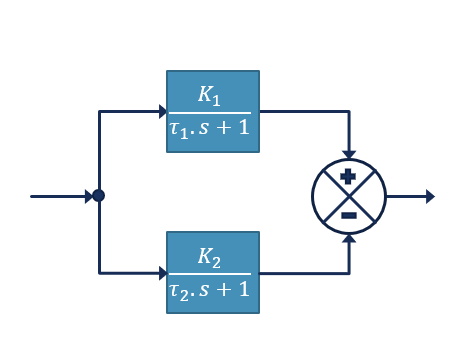

# Process

In [ ]:
K1 = 5.0
T1 = 5.0

In [ ]:
P1 = K1/(T1*s+1)

In [ ]:
K2 = 2.0
T2 = 1.0

In [ ]:
P2 = K2/(T2*s+1)

In [ ]:
Process = control.parallel(P1, -P2)

In [ ]:
OpenLoop = Process
Poles = control.poles(OpenLoop)
Poles

In [ ]:
roots, gains = control.root_locus(OpenLoop)

In [ ]:
gm, pm, sm, wpc, wgc, wms = control.stability_margins(OpenLoop)

In [ ]:
#Gain margin
gm

In [ ]:
#Phase margin
pm

In [ ]:
#Stability margin, the minimum distance from the Nyquist plot to -1
sm

In [ ]:
#Phase crossover frequency (where phase crosses -180 degrees), which is associated with the gain margin.
wpc

In [ ]:
#Gain crossover frequency (where gain crosses 1), which is associated with the phase margin.
wgc

In [ ]:
#Stability margin frequency (where Nyquist plot is closest to -1)
wms

### Ganho Limite / Crítico

In [ ]:
#Gain margin
Kcr = gm
Kcr

## Calcular o período de oscilação por frequência de cruzamento de fase

In [ ]:
#Phase crossover frequency (where phase crosses -180 degrees), which is associated with the gain margin.
fKu = wpc/(2*math.pi)
Tcr = 1/fKu
Tcr

## PI Controller - ZIEGLER e NICHOLS - Método 2

In [ ]:
Kc = 0.45*Kcr
Kc

In [ ]:
ti= Tcr/1.2
ti

# Controlador Feedback PI Simples

In [ ]:
# Define transfer function of the PID Controller
PIDControl = Kc *(1 + (1/(ti*s)))

In [ ]:
Series = control.series(PIDControl,Process)

In [ ]:
Sys = control.feedback(Series, 1, sign=-1)

In [ ]:
t, y = control.step_response(Sys)

In [ ]:
# Plot step response
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()

# Compensador de Resposta Inversa

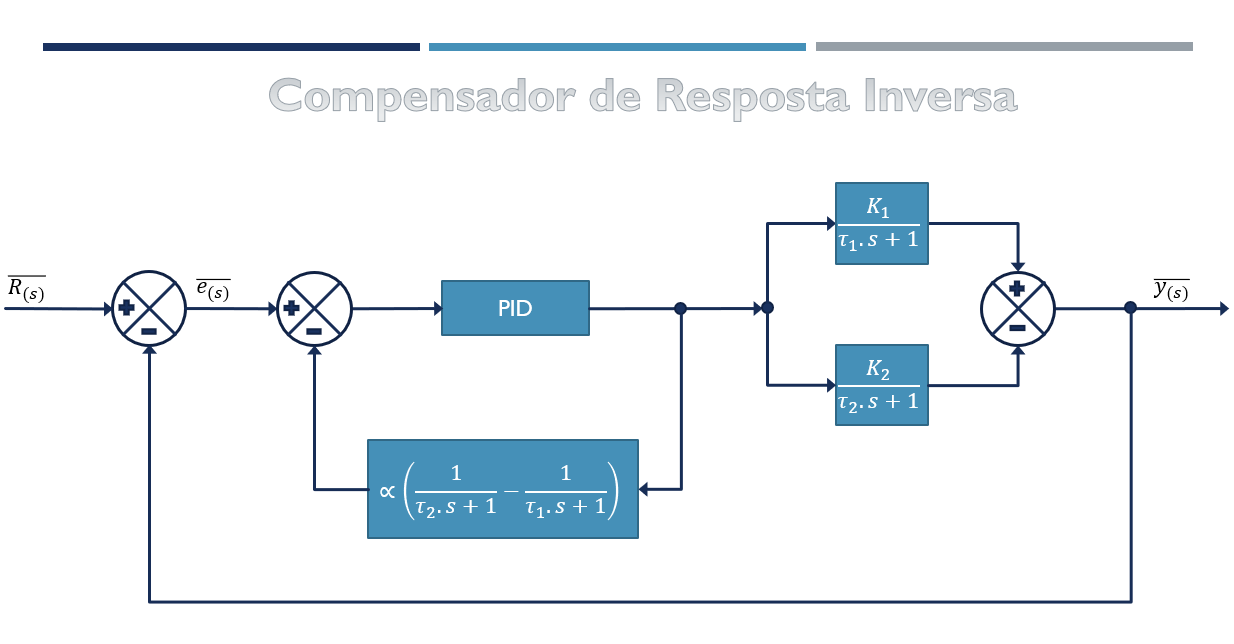

## Inner Level

In [ ]:
# Define transfer function of the PID Controller
PIDControl = Kc *(1 + (1/(ti*s)))

In [ ]:
AlfaEstimado = (K2*T1 - K1*T2)/(T1-T2)
AlfaEstimado

In [ ]:
Alfa = AlfaEstimado

In [ ]:
Compensador = Alfa * control.parallel(1/(T2*s+1), -1/(T1*s+1))
Compensador

In [ ]:
Inner_Loop = control.feedback(PIDControl, Compensador, sign=-1)

## Outer Level

In [ ]:
Outer = control.series(Inner_Loop,Process)

In [ ]:
Outer_Loop = control.feedback(Outer, 1, sign=-1)

## System Step Response

In [ ]:
t, y = control.step_response(Outer_Loop)

In [ ]:
# Plot step response
plt.figure(1)
plt.plot(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Output')
plt.title('System Step Response')
plt.grid()
plt.show()